# Visualize

In [29]:
!pip3 install scikit-learn

    100% |████████████████████████████████| 7.0MB 225kB/s eta 0:00:01
    100% |████████████████████████████████| 296kB 4.3MB/s eta 0:00:01


In [45]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import *
import matplotlib.pyplot as plt
# import seaborn as sns
import folium
from folium import Circle, Polygon, PolyLine, Marker
import collections
from folium import plugins
from sklearn.neighbors import KDTree
import queue

In [16]:
rivers_gpd = gpd.read_file('data/shapefiles/gms_river/gms_river.shp')
rivers_gpd = rivers_gpd[rivers_gpd['Maj_Name'] == 'Mekong Basin']
dams_gpd = gpd.read_file('data/shapefiles/dams/GRanD_Version_1_3/GRanD_dams_v1_3.shp')
dams_gpd = dams_gpd[dams_gpd.MAIN_BASIN == 'Mekong']

In [4]:
def add_line_string(line, strahler, m):
    attr = {'fill': '#007DEF', 'font-weight': 'bold', 'font-size': '24'}
    colorline_strah_map = ['green', 'red', 'blue', 'yellow', 'black', 'orange']
    colordirection_strah_map = ['#0a7400', '#ac1a1a', '#0c37a6', '#bacc05', '#7e7f71', '#ec9900' ]
    
    riverline = folium.PolyLine(line, color = colorline_strah_map[strahler - 1], weight = 2.5).add_to(m)
    attr['fill'] = colordirection_strah_map[strahler - 1]
    plugins.PolyLineTextPath(riverline, '\u27a4     ', repeat=True, offet=6, attributes=attr).add_to(m)
    return m

def river_map(data):
    '''
    Visualize river map with dataframe from shapefile.
    Color of river based on its strahler number.
    '''
    center = [19.570263289179646, 102.519677]
    m = folium.Map(location=center, zoom_start=4, tiles='Stamen Terrain')
    hasStrahler = 'Strahler' in data.columns
    
    for _,row in data.iterrows():
        if not hasStrahler or row['Strahler'] > 0:
            lines = row['geometry']
            if lines.type == 'LineString':
                lines = MultiLineString([lines])
            for line in lines:
                rev_line = [[tuple(reversed(t)) for t in list(line.coords)]]
                if not hasStrahler:
                    color = 1
                else:
                    color = row['Strahler']
                m = add_line_string(rev_line, color, m)
    return m

def add_dams(dams, m):
    dams_feature = folium.FeatureGroup(name="Dams")
    for _, row in dams.iterrows():
        s = row.DAM_NAME + " " + str(row.geometry)
        dams_feature.add_child(Marker(location=[row.geometry.y, row.geometry.x], popup=s))

    dams_feature.add_to(m)
    return m

In [33]:
m = river_map(rivers_gpd)
m = add_dams(selected_dams, m)

In [34]:
m.save('rivers.html')

In [7]:
rivers_gpd

,ARCID,FROM_NODE,TO_NODE,Sub_Bas,Maj_Bas,To_Bas,Sub_Name,Maj_Name,Sub_Area,Maj_Area,Strahler,GMS,geometry
301,66508,69267,69196,24007,24,24010,Weiyuan Jiang,Mekong Basin,54658,805761,2,2,"LINESTRING (100.10208 22.60625, 100.11875 22.6..."
302,66550,69305,69286,24007,24,24010,Weiyuan Jiang,Mekong Basin,54658,805761,1,2,"LINESTRING (101.38750 22.57083, 101.39375 22.5..."
303,66557,69196,69309,24007,24,24010,Weiyuan Jiang,Mekong Basin,54658,805761,4,2,"LINESTRING (100.37292 22.68125, 100.37708 22.6..."
304,66565,69257,69309,24007,24,24010,Weiyuan Jiang,Mekong Basin,54658,805761,1,2,"LINESTRING (100.67500 22.61458, 100.65625 22.6..."
305,66575,69327,69267,24007,24,24010,Weiyuan Jiang,Mekong Basin,54658,805761,1,2,"LINESTRING (100.14583 22.55417, 100.13542 22.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,66442,69004,69196,24007,24,24010,Weiyuan Jiang,Mekong Basin,54658,805761,4,2,"LINESTRING (100.32708 22.85208, 100.33542 22.8..."
4174,66507,68935,69267,24007,24,24010,Weiyuan Jiang,Mekong Basin,54658,805761,1,2,"LINESTRING (99.73333 22.92500, 99.77708 22.881..."
4175,66531,69061,69286,24007,24,24010,Weiyuan Jiang,Mekong Basin,54658,805761,2,2,"LINESTRING (101.19792 22.80208, 101.21042 22.8..."
4217,64353,66647,67048,24005,24,24007,Qingshuilang Shah,Mekong Basin,41313,805761,4,2,"LINESTRING (99.65625 25.05625, 99.70208 25.010..."


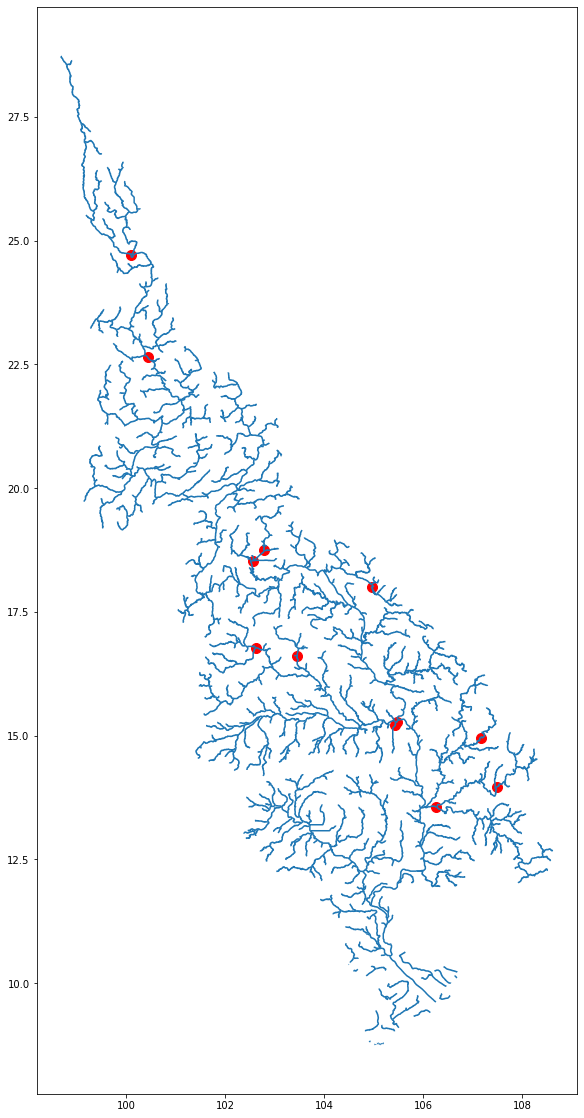

In [32]:
ax = rivers_gpd.plot(figsize=(20,20))
selected_dams.plot(markersize = 100, ax = ax, color='red')

In [9]:
from shapely.ops import transform
from functools import partial
import pyproj

project = partial(
    pyproj.transform,
    pyproj.Proj(init='EPSG:4326'),
    pyproj.Proj(init='EPSG:32633'))

line1 = rivers_gpd.iloc[0].geometry
# print(line1.type)
line2 = transform(project, line1)
print(line2.length/1000)

89.79938439416773


# Graph

In [178]:
import networkx as nx 
import matplotlib.pyplot as plt
from shapely.ops import transform
from functools import partial
import pyproj

project = partial(
    pyproj.transform,
    pyproj.Proj(init='EPSG:4326'),
    pyproj.Proj(init='EPSG:32633'))


def get_coords(lines, linestring_number, coord_number):
    coords = lines[linestring_number]
    res = coords.coords[coord_number]
    return res[::-1]

"""
@job: calculate length of river in meters
@input: lines: multilinestring
@output: length in meter
"""
def river_length(lines):
    return 1
    total_len = 0
    for riv in lines:
        total_len += transform(project, riv).length
    return total_len

G = nx.Graph()

node_idx = {}
def get_node_idx(coord):
    if coord not in node_idx:
        node_idx[coord] = len(node_idx)
    return node_idx[coord]

for _, row in rivers_gpd.iterrows():
    lines = row['geometry']
    if lines.type == 'LineString':
        lines = MultiLineString([lines])
    
    if True:
        for line in lines:
            line = line.coords
            for x, y in zip(line[:-1], line[1:]):
                G.add_node(get_node_idx(x), attr = {'coord': x})
                G.add_node(get_node_idx(y), attr = {'coord': y})
                G.add_edge(get_node_idx(x), get_node_idx(y)) # , attr={'len': transform(project, LineString([x, y]))})
    else:
        G.add_node(row.FROM_NODE, attr={'coords' : get_coords(lines, 0, 0)})
        G.add_node(row.TO_NODE, attr={'coords' : get_coords(lines, -1, -1)})
        riv_len = river_length(lines)
        G.add_edge(row.FROM_NODE, row.TO_NODE, attr={'len': riv_len, 'strahler': row.Strahler})
        G.add_edge(row.TO_NODE, row.FROM_NODE, attr={'len': riv_len, 'strahler': row.Strahler})
    
G.number_of_nodes(), G.number_of_edges()

(34846, 34806)

In [179]:
N, K = G.order(), G.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)
# print("SCC: ", nx.number_strongly_connected_components(G))
print("WCC: ", nx.number_connected_components(G))

Nodes:  34846
Edges:  34806
Average degree:  0.9988520920622166
WCC:  40


In [180]:
nodes = list(G.nodes)
coords = [G.nodes[node]['attr']['coord'] for node in nodes]
tree = KDTree(np.array(coords), leaf_size = 1)

In [181]:
dams = dams_gpd[dams_gpd.AREA_POLY > 0].copy()
# dams.drop(axis = 0, index = dams[dams.DAM_NAME == 'Sirindhorn'].index, inplace = True)
d = []
for i, row in dams.iterrows():
    dist, node = map(lambda x: x[0][0], tree.query(np.array([[row['LONG_DD'], row['LAT_DD']]])))
    if dist <= 0.05:
        print(row['DAM_NAME'], [[row['LONG_DD'], row['LAT_DD']]], coords[node], dist)
        d.append((row['DAM_NAME'], row['AREA_POLY'], dist, nodes[node]))
d.sort(key = lambda x: x[2])
display(d)
# Houayho, Danhim, Ham Thuan, Nam Mang 3
selected_dams = dams_gpd[dams_gpd.DAM_NAME.isin([x[0] for x in d])]
print(len(selected_dams))
len(set([x[-1] for x in d])) == len(selected_dams)

Zibihe [[99.955536, 26.136007]] (99.97291666666604, 26.135416666666064) 0.01739068909506572
Manwan [[100.448067, 24.623123]] (100.447916666666, 24.622916666666125) 0.00025529112005067843
Nam Ngum [[102.5491, 18.531233]] (102.547916666666, 18.531249999999563) 0.001183455440367614
Nam Leuk [[102.946765, 18.439659]] (102.97499999999928, 18.431249999999533) 0.02946059242390474
Nam Pung [[103.976042, 16.972114]] (103.99583333333258, 16.983333333332848) 0.02275017176890535
Ubol Ratana [[102.617817, 16.772725]] (102.61874999999928, 16.772916666666216) 0.000952483653188772
Lam Pao [[103.453125, 16.603534]] (103.45208333333265, 16.606249999999523) 0.0029089045091365315
Chulabhorn [[101.650246, 16.53714]] (101.64791666666596, 16.53958333333286) 0.0033757475552082974
Huai Kum [[101.79319, 16.41155]] (101.79374999999933, 16.41041666666626) 0.0012641378265913852
Lamtakhong [[101.560159, 14.863445]] (101.56041666666599, 14.860416666666229) 0.0030392753891666673
Lamphraphloeng [[101.839349, 14.592853

[('Ea Soup Thuong', 12.85, 2.733536644313676e-05, 22389),
 ('Jinghong', 24.91, 9.910712444952153e-05, 518),
 ('Dachaoshan', 20.46, 0.00010709549141905069, 33520),
 ('Gongguoqiao', 9.64, 0.00020541151163879054, 32420),
 ('Manwan', 36.91, 0.00025529112005067843, 33165),
 ('Lower Sesan II', 332.96, 0.00044111084605769394, 21729),
 ('Lamphraphloeng', 9.69, 0.0009271036134513205, 17043),
 ('Ubol Ratana', 313.38, 0.000952483653188772, 12561),
 ('Nam Theun 2', 414.34, 0.0011409022254770679, 10728),
 ('Nam Ngum', 436.93, 0.001183455440367614, 8435),
 ('Buon Kuop', 6.82, 0.0011849550381485227, 23112),
 ('Huai Kum', 1.84, 0.0012641378265913852, 13166),
 ('Sirindhorn', 235.58, 0.0013639373145594423, 16567),
 ('Nam Ngum 5', 4.42, 0.0018823541115910647, 7948),
 ('Pak Mun', 86.9, 0.0018876546286936433, 31213),
 ('Nuozhadu', 246.16, 0.0020798752631719596, 51),
 ('Lamnangrong', 11.57, 0.0022380671473117546, 17335),
 ('Krong Buk Ha', 10.15, 0.0022744294775240968, 22787),
 ('Lam Pao', 202.51, 0.00290890

30


True

In [192]:
dam_to_node = {}
for dam in d:
    dam_to_node[dam[0]] = dam[3]
    G.nodes.get(dam[3])['attr']['dam'] = dam[0]
dam_to_node

{'Ea Soup Thuong': 22389,
 'Jinghong': 518,
 'Dachaoshan': 33520,
 'Gongguoqiao': 32420,
 'Manwan': 33165,
 'Lower Sesan II': 21729,
 'Lamphraphloeng': 17043,
 'Ubol Ratana': 12561,
 'Nam Theun 2': 10728,
 'Nam Ngum': 8435,
 'Buon Kuop': 23112,
 'Huai Kum': 13166,
 'Sirindhorn': 16567,
 'Nam Ngum 5': 7948,
 'Pak Mun': 31213,
 'Nuozhadu': 51,
 'Lamnangrong': 17335,
 'Krong Buk Ha': 22787,
 'Lam Pao': 12702,
 'Lamtakhong': 16188,
 'Chulabhorn': 13126,
 'Plei Krong': 21116,
 'Xe Kaman 1': 19745,
 'Se San IV': 21568,
 'Xe Kaman 3': 19455,
 'Xiaowan': 33117,
 'Nam Ngum 2': 8089,
 'Zibihe': 32721,
 'Nam Pung': 11744,
 'Nam Leuk': 8888}

In [193]:
newGraph = nx.Graph()
for dam in dam_to_node.keys():
    dam_node = dam_to_node[dam]
    newGraph.add_node(dam, attr = {'coord': G.nodes.get(dam_node)['attr']['coord']})
for dam in dam_to_node.keys():
    dam_node = dam_to_node[dam]
    q = queue.Queue()
    dist = {dam_node: 0}
    q.put(dam_node)
    while q.qsize():
        u = q.get()
        for v in G.neighbors(u):
            if v not in dist:
                dist[v] = dist[u] + 1 # G.edges[u, v]['attr']['len']
                if 'dam' in G.nodes.get(v)['attr']:
                    newGraph.add_edge(dam, G.nodes.get(v)['attr']['dam'], attr = dist[v])
                else:
                    q.put(v)

(30, 61)

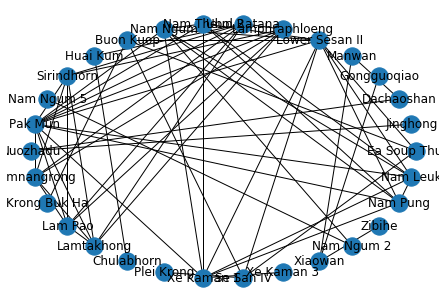

In [205]:
nx.draw_shell(newGraph, with_labels=True)
newGraph.number_of_nodes(), newGraph.number_of_edges()

In [204]:
def add_line_string2(line, m):
    riverline = folium.PolyLine(line, color = 'blue', weight = 2.5).add_to(m)
    return m

def river_map2(graph):
    '''
    Visualize river map with dataframe from shapefile.
    Color of river based on its strahler number.
    '''
    center = [19.570263289179646, 102.519677]
    m = folium.Map(location=center, zoom_start=6, tiles='Stamen Terrain')
    
    for x, y in graph.edges:
        line = [graph.nodes.get(x)['attr']['coord'][::-1], graph.nodes.get(y)['attr']['coord'][::-1]]
        m = add_line_string2(line, m)
        
    return m

def add_dams2(dams, m):
    dams_feature = folium.FeatureGroup(name="Dams")
    for _, row in dams.iterrows():
        s = row.DAM_NAME
        dams_feature.add_child(Marker(location=[row.geometry.y, row.geometry.x], popup=s))

    dams_feature.add_to(m)
    return m
m = river_map2(newGraph)
m = add_dams2(selected_dams, m)
m.save('new_rivers_network.html')